<a href="https://colab.research.google.com/github/sivanimarepalli/Online_fraud_detect/blob/main/onlinefraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [84]:
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [85]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [86]:
df.shape

(6362620, 11)

In [87]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [88]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [89]:
notF = df[df.isFraud == 0].sample(8213)
isF = df[df.isFraud == 1]

In [90]:
newDf = pd.concat([isF, notF]).sort_index()
newDf.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4785961,345,CASH_OUT,34363.83,C1286437910,2329.00,0.00,C561365501,114913.59,149277.42,0,0
3188675,240,PAYMENT,14969.13,C382460217,69956.00,54986.87,M1229610336,0.00,0.00,0,0
931825,43,CASH_IN,178435.72,C195537364,3178631.10,3357066.82,C584422779,310757.59,132321.87,0,0
1030556,72,CASH_OUT,622235.32,C615309889,622235.32,0.00,C755984599,3377968.96,4000204.28,1,0
3192026,241,TRANSFER,657417.64,C1148562150,657417.64,0.00,C1745091361,0.00,0.00,1,0


In [91]:
newDf.shape

(16426, 11)

In [92]:
newDf['isFraud'].value_counts()

,count
isFraud,
1,8213
0,8213


In [93]:
newDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ MB


In [94]:
newDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,16426.0,3.071916e+02,1.930989e+02,1.0,162.0000,285.000,4.107500e+02,7.430000e+02
amount,16426.0,8.202853e+05,1.851413e+06,0.0,38503.0275,171839.935,5.395160e+05,2.480481e+07
oldbalanceOrg,16426.0,1.291237e+06,3.347944e+06,0.0,11144.2500,126865.680,8.279348e+05,5.958504e+07
newbalanceOrig,16426.0,5.744108e+05,2.643504e+06,0.0,0.0000,0.000,0.000000e+00,4.958504e+07
oldbalanceDest,16426.0,8.136821e+05,3.063263e+06,0.0,0.0000,0.000,5.180476e+05,2.362305e+08
newbalanceDest,16426.0,1.237490e+06,3.452153e+06,0.0,0.0000,121533.855,1.085398e+06,2.367265e+08
isFraud,16426.0,5.000000e-01,5.000152e-01,0.0,0.0000,0.500,1.000000e+00,1.000000e+00
isFlaggedFraud,16426.0,9.740655e-04,3.119577e-02,0.0,0.0000,0.000,0.000000e+00,1.000000e+00


In [95]:
newDf['type'].value_counts()

,count
type,
CASH_OUT,6970
TRANSFER,4732
PAYMENT,2782
CASH_IN,1887
DEBIT,55


<Axes: xlabel='type', ylabel='amount'>

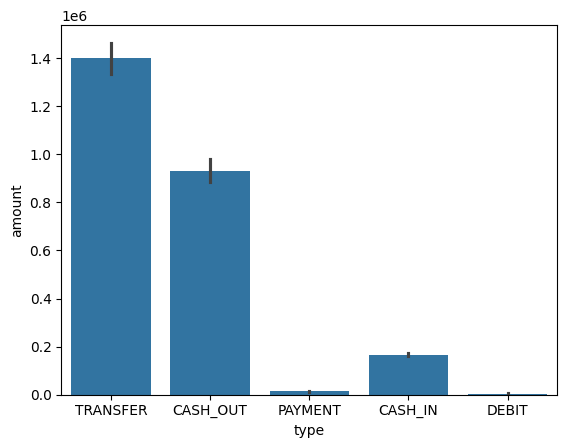

In [96]:
sns.barplot(x='type',y='amount', data=newDf)

<Axes: xlabel='amount', ylabel='step'>

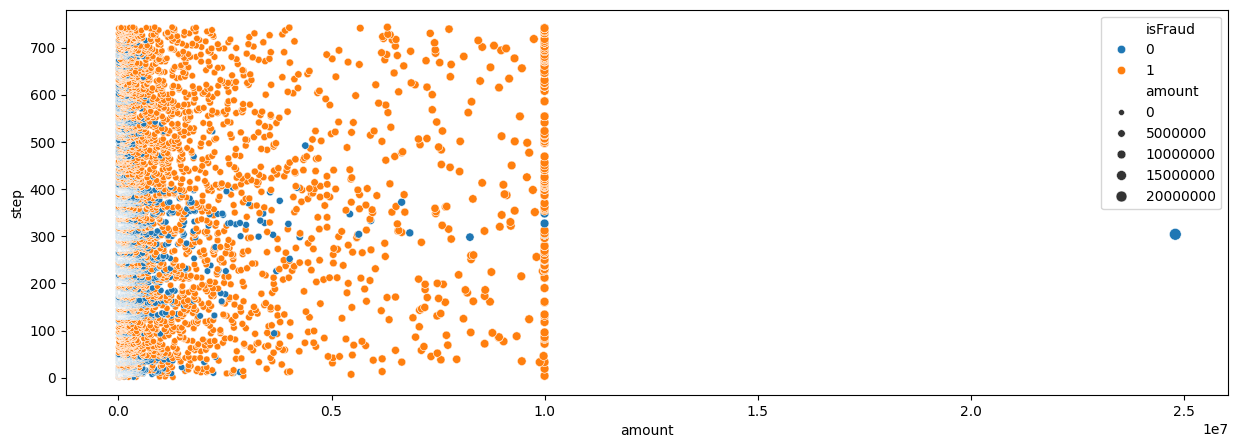

In [97]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=newDf,x='amount',y='step',hue='isFraud',size='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceDest'>

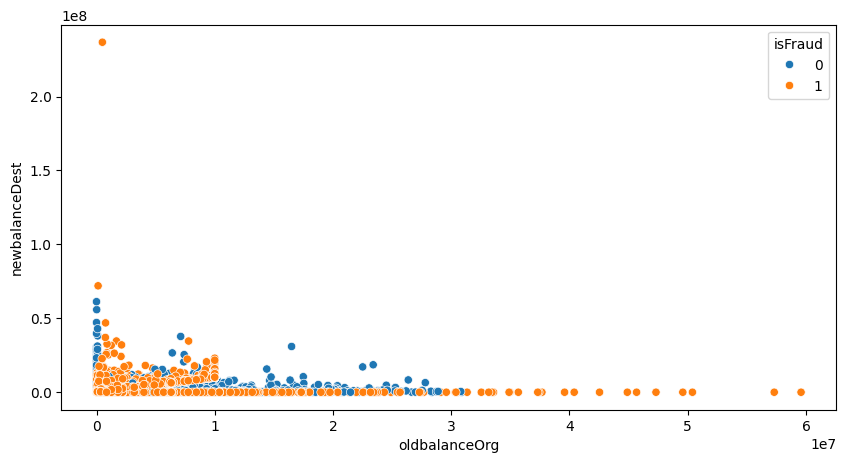

In [98]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=newDf,x='oldbalanceOrg',y='newbalanceDest',hue='isFraud')

In [99]:
CrosstabResult=pd.crosstab(index=newDf.type,columns=df.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1887,0
CASH_OUT,2854,4116
DEBIT,55,0
PAYMENT,2782,0
TRANSFER,635,4097


<Axes: xlabel='type'>

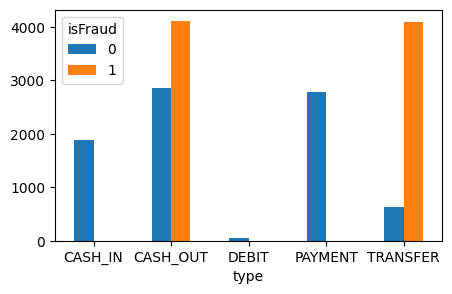

In [100]:
CrosstabResult.plot.bar(figsize=(5,3), rot=0)

In [101]:
CrossTab_step= pd.crosstab(index=newDf.step,columns=df.isFraud).sort_values(by=1, ascending=False).head(5)
CrossTab_step

isFraud,0,1
step,,
212,38,40
523,0,30
249,34,28
425,0,28
501,0,28


<Axes: xlabel='step'>

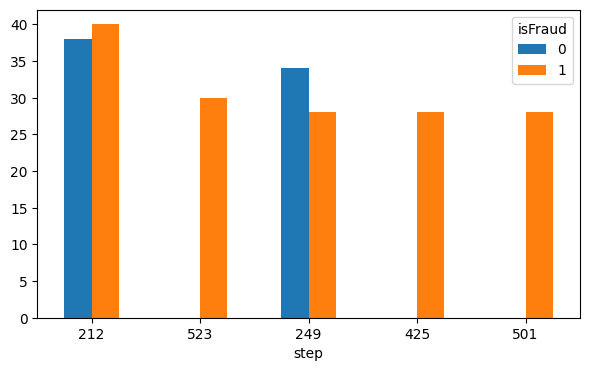

In [102]:
CrossTab_step.plot.bar(figsize=(7,4), rot=0)

In [103]:
df_1 = pd.get_dummies(newDf,columns=['type'])
df_1.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,True,False,False,False
23,1,3876.41,C504336483,67852.0,63975.59,M1404932042,0.0,0.0,0,0,False,False,False,True,False
251,1,2806.00,C1420196421,2806.0,0.00,C972765878,0.0,0.0,1,0,False,False,False,False,True
252,1,2806.00,C2101527076,2806.0,0.00,C1007251739,26202.0,0.0,1,0,False,True,False,False,False


In [104]:
df_1=df_1.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [105]:

X = df_1.loc[:, df_1.columns!= 'isFraud']
y = df_1.loc[:, df_1.columns== 'isFraud']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [107]:
model = svm.SVC(kernel='rbf',C=30)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9005681818181818

In [108]:
model1=LogisticRegression(solver='liblinear',multi_class='ovr',random_state=42)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.9182224025974026

In [109]:
model2=RandomForestClassifier(n_estimators=5)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.9882305194805194

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [111]:
model_pred_test = model.predict(X_test)
accuracy_score(y_test, model_pred_test)

0.9005681818181818

In [112]:
conf_matrix = confusion_matrix(y_test, model_pred_test)
conf_matrix

array([[2391,   79],
       [ 411, 2047]])

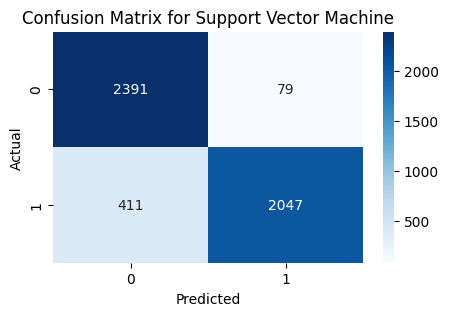

In [113]:
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

In [114]:
print(classification_report(y_test, model_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2470
           1       0.96      0.83      0.89      2458

    accuracy                           0.90      4928
   macro avg       0.91      0.90      0.90      4928
weighted avg       0.91      0.90      0.90      4928



In [115]:
model1_pred_test = model1.predict(X_test)
accuracy_score(y_test, model1_pred_test)

0.9182224025974026

In [116]:
conf_matrix1 = confusion_matrix(y_test,model1_pred_test)
conf_matrix1

array([[2136,  334],
       [  69, 2389]])

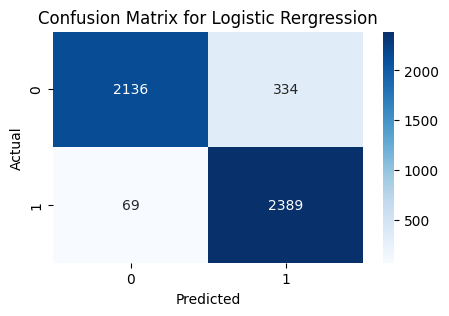

In [117]:
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Rergression')
plt.show()

In [118]:
print(classification_report(y_test, model1_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2470
           1       0.88      0.97      0.92      2458

    accuracy                           0.92      4928
   macro avg       0.92      0.92      0.92      4928
weighted avg       0.92      0.92      0.92      4928



In [119]:
model2_pred_test = model2.predict(X_test)
accuracy_score(y_test, model2_pred_test)

0.9882305194805194

In [120]:
conf_matrix2 = confusion_matrix(y_test, model2_pred_test)
conf_matrix2

array([[2433,   37],
       [  21, 2437]])

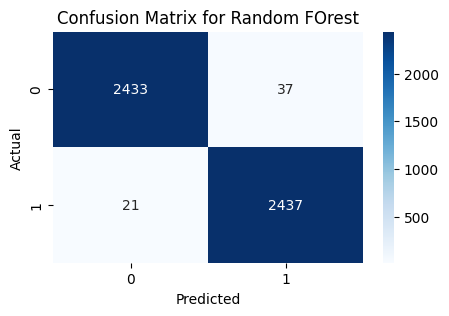

In [121]:
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random FOrest')
plt.show()

In [122]:
print(classification_report(y_test, model2_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2470
           1       0.99      0.99      0.99      2458

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [123]:
X1 = df_1.loc[:, df_1.columns!= 'isFraud']
y1 = np.squeeze(df_1.loc[:, df_1.columns== 'isFraud'])
# Here we have used function np.squeeze just to trim any redundant dimensions

In [124]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

In [125]:

model_params = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
            'C': [10,20,30],
            'kernel': ['rbf'],
            'gamma' : ['scale','auto']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'solver' : ['liblinear','lbfgs'],
           'multi_class' : ['auto','ovr'],
            'C': [1,5,10]
        }
    }
}

In [126]:
# Definig a variable Scores to store each model outcome

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X1_train,y1_train)
    clf.score(X1_test, y1_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [127]:
df_new = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_new

,model,best_score,best_params
0,svm,0.908071,"{'C': 30, 'gamma': 'scale', 'kernel': 'rbf'}"
1,random_forest,0.987998,{'n_estimators': 5}
2,logistic_regression,0.919638,"{'C': 5, 'multi_class': 'auto', 'solver': 'lib..."
